In [3]:
import pandas as pd 

 ### Pandas 
Pandas is an open source Python library, primarily used to analyze and manipulate data.

In [4]:
hour = pd.read_csv('hour.csv')
print(hour.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  count  
0           1  0.24  0.2879  0.81        0.0       3          13     16  
1           1  0.22  0.2727  0.80        0.0       8          32     40  
2           1  0.22  0.2727  0.80        0.0       5          27     32  
3           1  0.24  0.2879  0.75        0.0       3          10     13  
4           1  0.24  0.2879  0.75        0.0       0           1      1  


read_csv() = Reads the file data <br>
pd.head() = Returns the first N rows (5 by default).

In [5]:
print(f"Mean of Total Count: {hour['count'].mean()}")
print(f"Median of Total Count: {hour['count'].median()}")
print(f"Maximum Registered : {hour['registered'].max()}")
print(f"Minimum Registered : {hour['registered'].min()}")
print(f"Standard Deviation of Total Count: {hour['count'].std()}")

Mean of Total Count: 189.46308763450142
Median of Total Count: 142.0
Maximum Registered : 886
Minimum Registered : 0
Standard Deviation of Total Count: 181.38759909186476


## Summary Statistics 
### Simple calculations which help us understand the data closely and understand the nature of it. All the functions are performed through pandas.
Mean - Sum of all values divided by total no. of values (Average)   .mean() <br>
Median - The middle value of a series (In case of even numbers, the middle two are added and divided by two)  .median() <br>
Max - Maximum Value within the range .max() <br>
Min - Minimum value within the range .min() <br>
Standard Deviation - Shows how far is the data from its mean value. Ex : +- 181  .std() <br>


In [6]:
print(hour.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

### .describe() 
* Checks the summary statistics for all the values in the data.<br>
* Gives an overview about redundancies and assessing plausibility of the data. <br>
25%['count'] = Means, 25% of the hours in dataset had a value of 40  users or below. <br>
50%['count'] = Means, 50% of the hours in dataset had a value of 142 users or below. <br>
75%['count'] = Means, 75% of the hours in dataset had a value of 281 users or below. <br>

## Analyzing Subsets of the Data
After Summary Statistics, It's important to verify if the assesment is correct. <br>
For Example : If the user count during the night is really low and i want to decrease the price of bicycles, I must check the data only for that time period and confirm it.


## Nighttime Data

In [7]:
print(hour.loc[3,'count'])

13


### .loc() method
Whenever we want to have a subset from the entire data, we use the loc() method, by using squared brackets [] where, [<row>, <column>] <br>
In the above example, we are indicating that we want to select row from our data and column count. <br>
Pandas also use zero-based indexing (<b>NOTE</b>)

In [8]:
print(hour.loc[0:10, 'count'])

0     16
1     40
2     32
3     13
4      1
5      1
6      2
7      3
8      8
9     14
10    36
Name: count, dtype: int64


Incase we want multiple rows/columns we can use <b>:</b> to specify the range. <br>
Instead of printing all the data, when we print only a few rows / subsets. The process is called <b>"subsetting"</b>

In [12]:
print(f"Mean of registered users between 1-5AM : {hour.loc[hour['hr']<5, 'registered'].mean()}")

Mean of registered users between 1-5AM : 20.7881427367238


We can also specify a logical condition for which we want the row to be decided.

In [17]:
print(f"Average number of riders in midnight (1-4AM) in winters: {hour.loc[(hour['hr'] < 5) & (hour['temp'] < 0.50), 'count'].mean()}")
print(f"Average number of riders in midnight (1-4AM) in summers: {hour.loc[(hour['hr'] < 5) & (hour['temp'] > 0.50), 'count'].mean()}")

Average number of riders in midnight (1-4AM) in winters: 19.521104742053154
Average number of riders in midnight (1-4AM) in summers: 33.639322916666664


With .loc() we can also specify multiple logical conditions separated by an <b>&</b> character.

In [20]:
print(f"Average number of riders during warm weather and high humidity :  {hour.loc[(hour['temp'] > 0.5) | (hour['hum'] > 0.5), 'count'].mean()}")

Average number of riders during warm weather and high humidity :  193.36764103264582


Logical conditions combined with <b>|</b> (OR)

## Seasonal Data

### groupby() -
This function is used to group data together and use for computation.<br>
For Example : If i want to group together seasons and find the average count of riders in all seasons. <br>
1 = Winter, 2 = Spring, 3 = Summer, 4 = Fall

In [22]:
print(hour.groupby(['season'])['count'].mean())

season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: count, dtype: float64


<b>groupby()</b> function can also be performed on multiple columns. For example - Where, 0 = Non-Holiday and 1 = Holiday <br>
Here, I have specified two columns to group on season and holiday.

In [24]:
print(hour.groupby(['season', 'holiday'])['count'].mean())

season  holiday
1       0          112.685875
        1           72.042683
2       0          208.428472
        1          204.552083
3       0          235.976818
        1          237.822917
4       0          199.965998
        1          167.722222
Name: count, dtype: float64


## Visualizing Data using 'matplotlib'
### What is matplotlib?
Matplotlib is a comprehensive python library used for generating static, animated, interactive visualizations.<br>

# Drawing and displaying a simple plot

In [25]:
import matplotlib.pyplot as plt

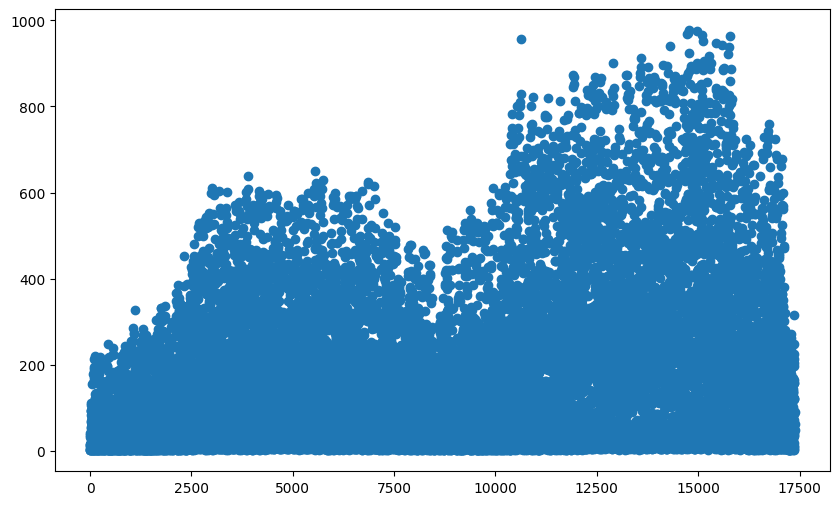

In [26]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(x = hour['instant'], y = hour['count'])
plt.show()

In [38]:
fig = plt.figure(figsize = (2,2), facecolor = 'lightskyblue')
plt.show()

<Figure size 200x200 with 0 Axes>

## plt.figure()
The artistry happens on this figure! We can add more stuff on it as we add axes.

# Introduction to Axes (Subplots)
Axes are the gateway to visualization on figure. Once the axes are placed, it incorporates two axis on the figure on which methods like xlabel, ylabel, title and legends can be applied. <br>
fig, ax = plt.subplots() Returns a figure and an array of Axes. Adds a single Axes to a figure.



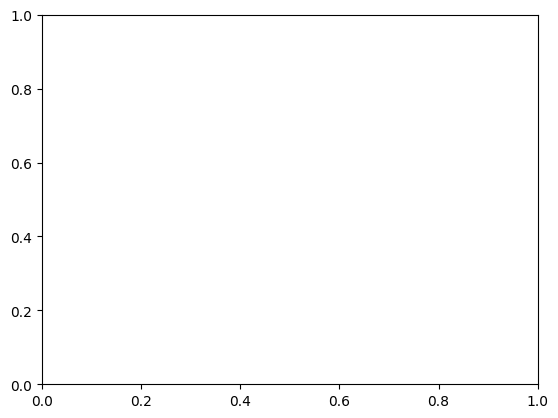

In [39]:
fig, ax = plt.subplots()
plt.show()